In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

In [2]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [50]:
data = pd.read_csv("cap_data_final3.csv")

In [51]:
data

,district,state,abbreviation,state_dist,year,laborforce_unemployed,PercentCar,PercentCarpool,PercentPublicTrans,Walked,...,r25k_50k,r50k_100k,r100k_200k,r200kplus,NoHighSchool,HighSchoolEd,SomeCollege,BachelorsOrHigher,pct_won,party
0,1,Alabama,AL,AL-1,2014,4.7,87.3,7.2,0.4,0.8,...,25.8,28.1,13.8,2.5,13.5,32.7,30.7,23.1,68.16,R
1,2,Alabama,AL,AL-2,2014,5.2,85.1,9.0,0.4,1.2,...,27.3,27.6,12.8,2.0,16.4,32.4,29.5,21.6,67.34,R
2,3,Alabama,AL,AL-3,2014,5.2,86.3,8.4,0.4,1.2,...,27.1,27.2,12.2,2.0,16.6,33.0,30.1,20.4,66.12,R
3,4,Alabama,AL,AL-4,2014,4.1,86.1,9.6,0.3,0.8,...,26.8,27.7,10.5,1.5,19.3,35.1,29.3,16.3,98.57,R
4,5,Alabama,AL,AL-5,2014,4.6,87.2,6.9,0.4,1.3,...,24.9,27.8,17.7,3.8,14.0,26.6,29.9,29.5,74.42,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,6,Wisconsin,WI,WI-6,2018,2.0,84.8,7.1,0.3,2.2,...,23.1,34.9,19.4,4.3,7.6,33.5,33.3,25.5,55.47,R
1301,8,Wisconsin,WI,WI-8,2018,1.6,84.8,7.4,0.4,2.0,...,23.0,35.2,21.0,4.2,7.2,34.6,31.8,26.4,63.69,R
1302,0,Wyoming,WY,WY-0,2014,2.9,76.8,11.0,1.6,3.6,...,23.5,32.0,20.6,3.3,7.5,27.4,38.6,26.6,66.05,R
1303,0,Wyoming,WY,WY-0,2016,3.7,77.8,9.0,1.5,4.6,...,23.5,31.9,21.3,3.8,6.9,29.3,36.8,27.1,60.35,R


In [52]:
#Set your year here: (2014, 2016, or 2018)
data = data.loc[(data['year'] == 2014),:]

In [53]:
#Data Cleaner
data = data.dropna().reset_index()
data = data.drop(columns= ['district', 'state', 'abbreviation', 'year', 'party', 'state_dist', 'index'])

In [54]:
data

,laborforce_unemployed,PercentCar,PercentCarpool,PercentPublicTrans,Walked,Other_means,Management_business_science_and_arts,Service,Sales_and_office,Natural_resources_construction_and_maintenance,...,U25k,r25k_50k,r50k_100k,r100k_200k,r200kplus,NoHighSchool,HighSchoolEd,SomeCollege,BachelorsOrHigher,pct_won
0,4.7,87.3,7.2,0.4,0.8,1.0,31.5,17.2,26.8,10.0,...,29.8,25.8,28.1,13.8,2.5,13.5,32.7,30.7,23.1,68.16
1,5.2,85.1,9.0,0.4,1.2,1.3,31.6,17.3,24.9,10.4,...,30.2,27.3,27.6,12.8,2.0,16.4,32.4,29.5,21.6,67.34
2,5.2,86.3,8.4,0.4,1.2,1.1,30.8,16.3,24.4,10.0,...,31.6,27.1,27.2,12.2,2.0,16.6,33.0,30.1,20.4,66.12
3,4.1,86.1,9.6,0.3,0.8,0.6,28.1,17.1,21.8,12.1,...,33.4,26.8,27.7,10.5,1.5,19.3,35.1,29.3,16.3,98.57
4,4.6,87.2,6.9,0.4,1.3,1.3,38.4,16.1,22.5,9.1,...,25.7,24.9,27.8,17.7,3.8,14.0,26.6,29.9,29.5,74.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,2.9,84.6,7.8,1.0,2.0,1.1,40.7,15.0,23.1,7.4,...,16.4,22.9,33.1,22.0,5.5,6.4,27.7,30.6,35.3,69.45
431,2.8,83.9,7.4,0.6,2.6,1.8,31.3,16.9,22.0,8.6,...,19.9,26.2,34.7,16.1,3.1,8.0,35.4,31.9,24.7,56.77
432,3.2,80.8,9.4,0.4,2.9,1.3,31.0,16.7,22.1,11.4,...,22.6,27.4,34.1,13.7,2.2,8.3,37.2,32.7,21.7,59.28
433,2.8,84.7,6.9,0.5,2.3,2.0,31.8,16.3,23.0,9.5,...,20.0,26.0,34.8,16.8,2.5,8.3,36.1,31.3,24.4,65.01


### PCA Analysis

In [6]:
data = pd.read_csv("cap_data_final3.csv")
data = data.loc[(data['year'] == 2014),:]
data = data.dropna().reset_index()
data = data.drop(columns= ['district', 'state', 'abbreviation', 'year', 'state_dist', 'index'])

In [7]:
#Standardize the Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data.drop('party', 1))

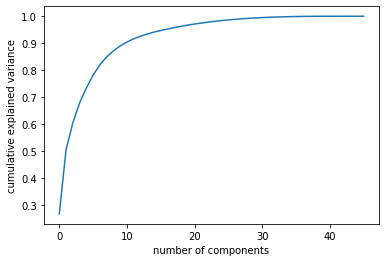

In [8]:
#Check for the best number of PCAs
pca = PCA().fit(data_rescaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Dendrogram of Clusters

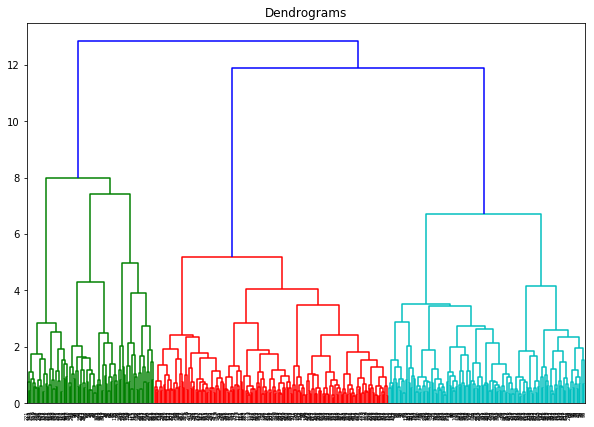

In [8]:
#Run a Dendrogram to look for the best amount of clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(train, method='ward'))

### 2014 Average Silohette Score

In [21]:
#Choose the 2014 data and drop the columns
data = pd.read_csv("cap_data_final3.csv")
data = data.loc[(data['year'] == 2014),:]
data = data.dropna().reset_index()
data = data.drop(columns= ['district', 'state', 'abbreviation', 'year', 'state_dist', 'index'])

In [22]:
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data.drop('party', 1))

In [23]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(data_rescaled)
train = pca.transform(data_rescaled)

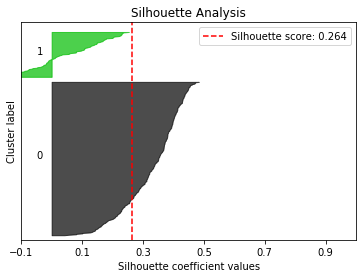

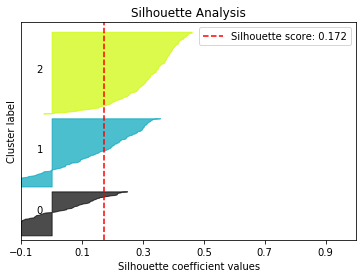

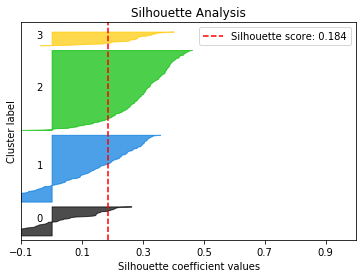

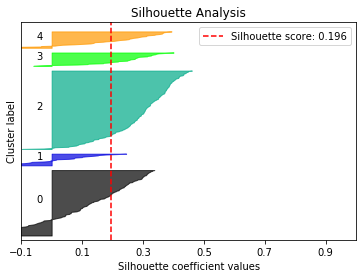

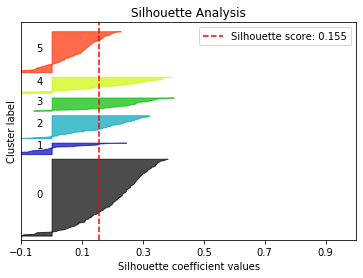

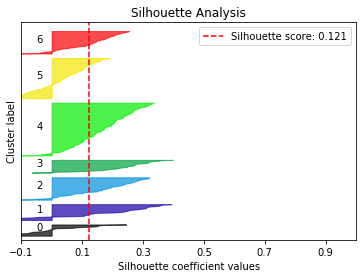

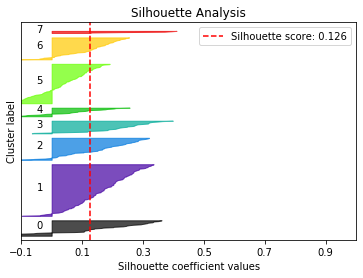

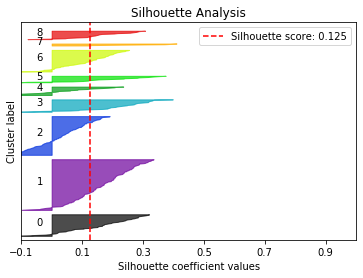

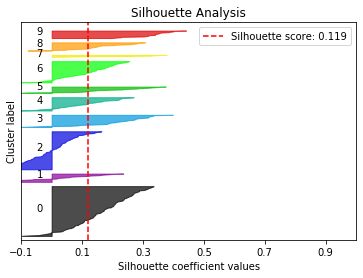

In [24]:
#Get the Silhouette Scores for the best amoiunt of clusters
for i in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward') 
    cluster_labels = cluster.fit_predict(train)
    skplt.metrics.plot_silhouette(train, cluster_labels)
    plt.show()

### 2014 Hierarchical Clustering

#### 2 Clusters

In [26]:
data = pd.read_csv("cap_data_final3.csv")
data = data.loc[(data['year'] == 2014),:]
data = data.dropna().reset_index()
data = data.drop(columns= ['district', 'state', 'abbreviation', 'year', 'state_dist', 'index'])

In [27]:
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data.drop('party', 1))

In [28]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(data_rescaled)
train = pca.transform(data_rescaled)

In [29]:
#Run the cluster(choose a cluster between 2 to 6)
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(train)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

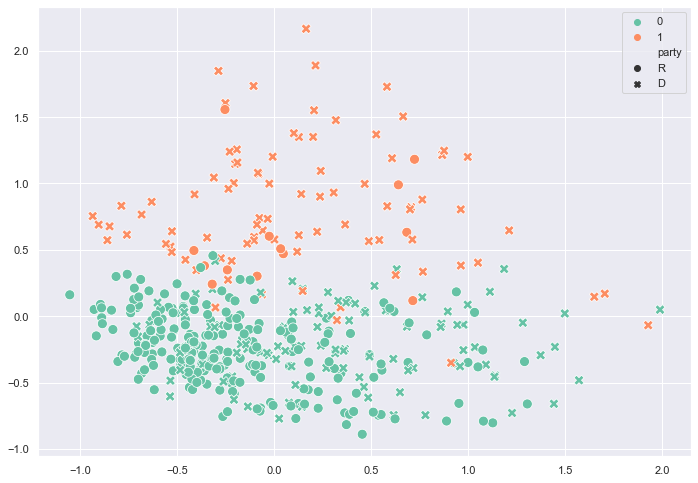

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(train[:,0], train[:,1], cluster.labels_, palette = 'Set2', style = data.party, s =100)

#### 3 clusters

In [487]:
pca = PCA(0.95)
pca.fit(data_rescaled)
train = pca.transform(data_rescaled)

In [488]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(train)

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 2,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2,

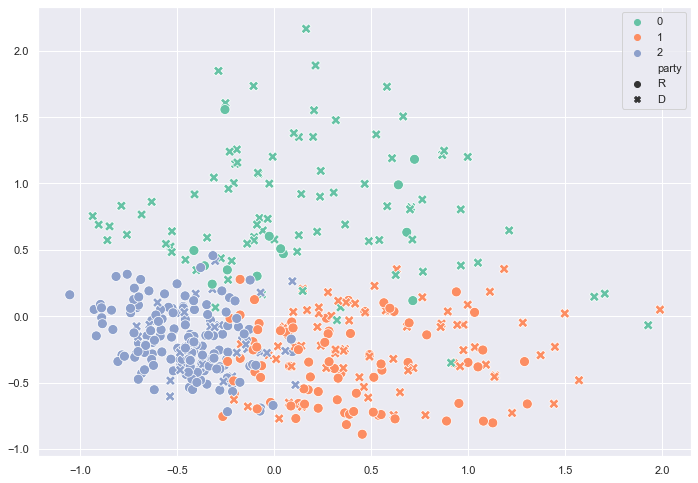

In [412]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(train[:,0], train[:,1], cluster.labels_, palette = 'Set2', style = data.party, s =100)

#### 4 Clusters

In [490]:
pca = PCA(0.95)
pca.fit(data_rescaled)
train = pca.transform(data_rescaled)

In [491]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(train)

array([2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 3, 2, 1, 2, 0, 1, 2, 1, 2, 3, 1, 2, 2, 2, 2, 3, 1, 0, 0,
       3, 0, 0, 0, 2, 3, 2, 3, 3, 1, 1, 2, 2, 2, 1, 2, 3, 2, 1, 1, 2, 2,
       3, 3, 1, 0, 1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 3, 3, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 3, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 1, 2, 2, 2, 2,

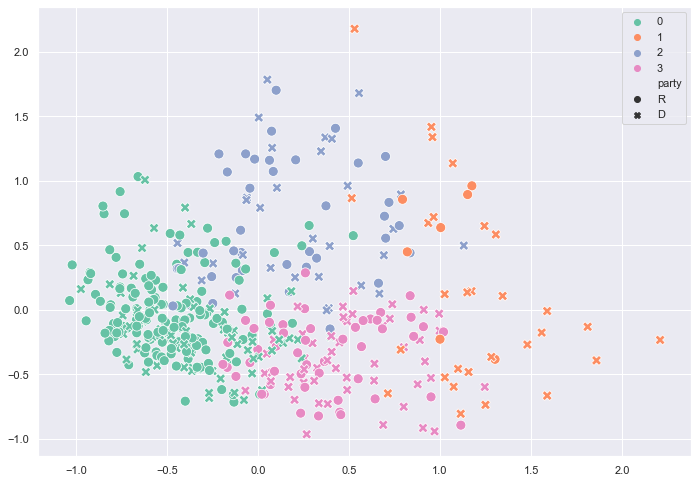

In [333]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(train[:,0], train[:,1], cluster.labels_, palette = 'Set2', style = data.party, s =100)

#### 6 Clusters

In [334]:
pca = PCA(0.95)
pca.fit(data_rescaled)
train = pca.transform(data_rescaled)

In [335]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(train)

array([4, 1, 1, 1, 4, 4, 1, 1, 1, 1, 3, 0, 3, 1, 3, 3, 0, 1, 1, 1, 1, 3,
       0, 2, 0, 5, 0, 3, 0, 3, 0, 3, 2, 2, 2, 2, 3, 3, 0, 3, 3, 0, 0, 3,
       3, 0, 2, 0, 3, 0, 2, 2, 2, 0, 2, 0, 3, 2, 2, 3, 1, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 3, 0, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1,
       0, 3, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 4, 0, 3,
       1, 1, 0, 1, 3, 0, 4, 4, 1, 1, 4, 4, 4, 3, 4, 1, 3, 1, 3, 3, 1, 1,
       1, 4, 0, 2, 3, 1, 1, 1, 0, 3, 0, 0, 1, 1, 4, 2, 3, 4, 1, 1, 3, 1,
       1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       4, 4, 1, 1, 1, 4, 4, 1, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 3, 2, 2, 1,
       1, 4, 1, 1, 1, 1, 4, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3,
       4, 4, 4, 1, 3, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 0, 3, 0, 1, 1,
       3, 1, 3, 0, 5, 1, 3, 1, 3, 3, 3, 5, 0, 1, 0, 3, 5, 1, 5, 3, 5, 5,
       1, 1, 3, 5, 3, 3, 1, 5, 5, 2, 2, 5, 3, 5, 3, 1, 1, 1, 1, 1, 1, 4,
       1, 3, 1, 3, 1, 4, 1, 3, 1, 1, 3, 1, 1, 4, 1,

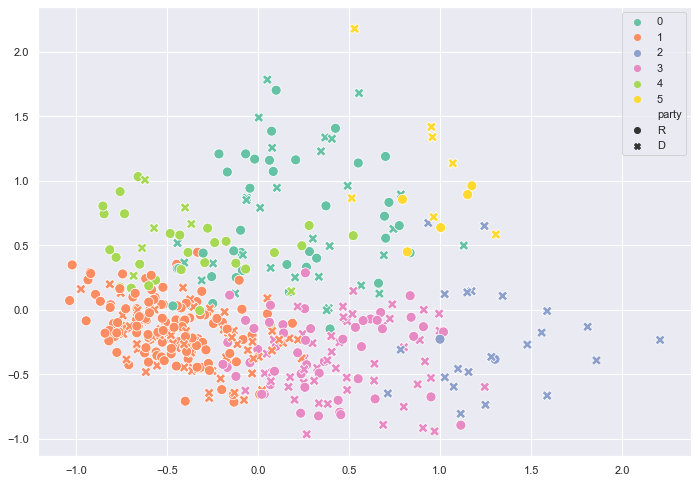

In [336]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(train[:,0], train[:,1], cluster.labels_, palette = 'Set2', style = data.party, s =100)

#### 8 Clusters

In [337]:
pca = PCA(0.95)
pca.fit(data_rescaled)
train = pca.transform(data_rescaled)

In [338]:
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')  
cluster.fit_predict(train)

array([4, 1, 1, 1, 4, 4, 1, 7, 7, 1, 0, 6, 0, 7, 0, 0, 3, 1, 1, 1, 7, 0,
       3, 2, 3, 5, 3, 0, 3, 0, 3, 0, 2, 2, 2, 2, 0, 0, 6, 0, 0, 3, 3, 0,
       0, 3, 2, 6, 0, 3, 2, 2, 2, 6, 2, 3, 0, 2, 2, 0, 7, 3, 3, 6, 3, 6,
       3, 6, 0, 6, 3, 6, 0, 6, 0, 7, 0, 0, 0, 0, 7, 1, 1, 0, 1, 1, 1, 7,
       3, 0, 1, 1, 6, 3, 1, 1, 6, 1, 3, 1, 3, 3, 3, 3, 3, 7, 7, 4, 3, 0,
       1, 1, 3, 1, 0, 3, 4, 4, 1, 1, 4, 4, 4, 0, 4, 1, 0, 1, 0, 0, 7, 7,
       1, 4, 3, 2, 0, 1, 1, 1, 3, 0, 3, 6, 7, 1, 4, 2, 0, 4, 1, 1, 0, 1,
       1, 1, 1, 1, 4, 0, 1, 1, 1, 7, 0, 7, 7, 1, 1, 1, 1, 1, 7, 1, 4, 1,
       4, 4, 1, 1, 1, 4, 4, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1,
       1, 4, 1, 1, 1, 1, 4, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       4, 4, 4, 1, 0, 1, 1, 7, 1, 1, 4, 1, 7, 0, 7, 7, 7, 6, 0, 3, 1, 1,
       0, 1, 0, 3, 5, 1, 0, 1, 0, 0, 0, 5, 3, 7, 3, 0, 5, 1, 5, 0, 5, 5,
       1, 1, 0, 5, 0, 0, 1, 5, 5, 2, 2, 5, 0, 5, 0, 1, 1, 1, 1, 1, 1, 4,
       1, 0, 1, 0, 1, 4, 1, 0, 1, 1, 0, 7, 1, 4, 1,

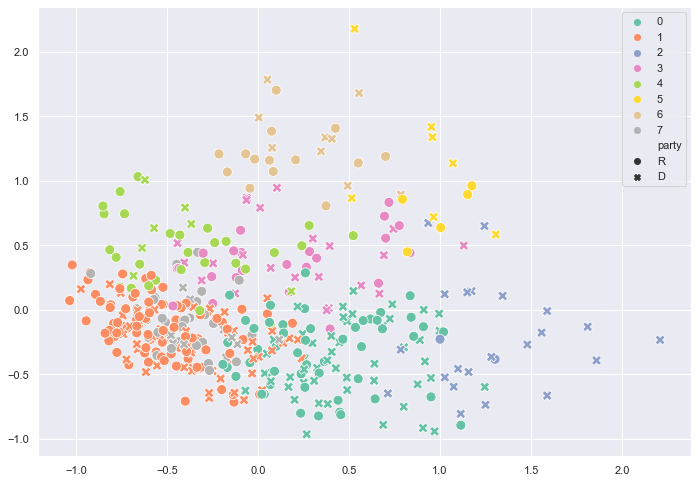

In [339]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(train[:,0], train[:,1], cluster.labels_, palette = 'Set2', style = data.party, s =100)

### 2016 Average Silohette Score

In [35]:
data = pd.read_csv("cap_data_final3.csv")
data = data.loc[(data['year'] == 2016),:]
data = data.dropna().reset_index()
data = data.drop(columns= ['district', 'state', 'abbreviation', 'year', 'state_dist', 'index'])

In [36]:
#Standardize the Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data.drop('party', 1))

In [37]:
pca = PCA(0.95)
pca.fit(data_rescaled)
train = pca.transform(data_rescaled)

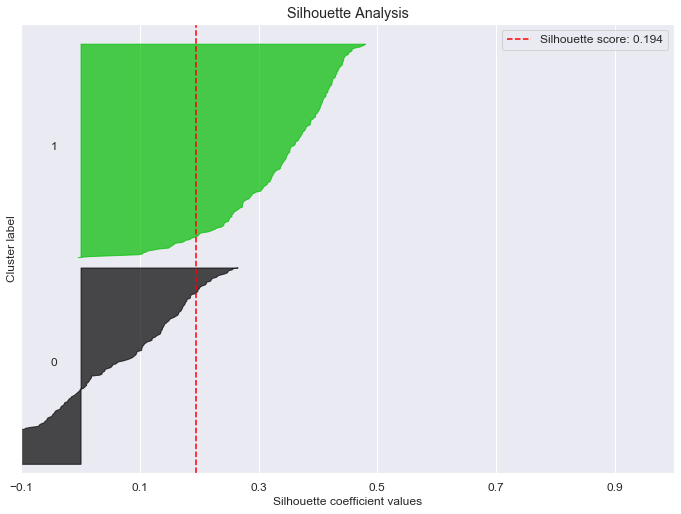

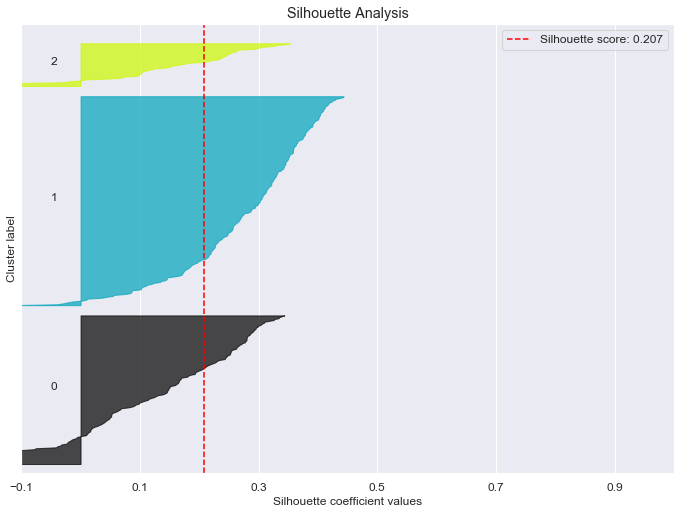

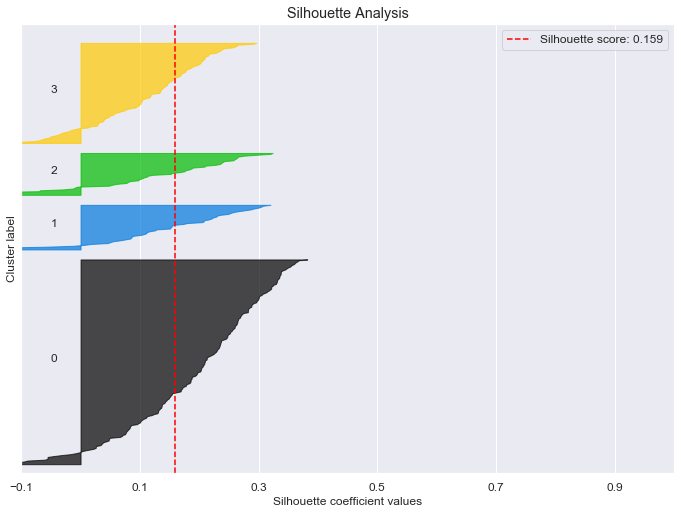

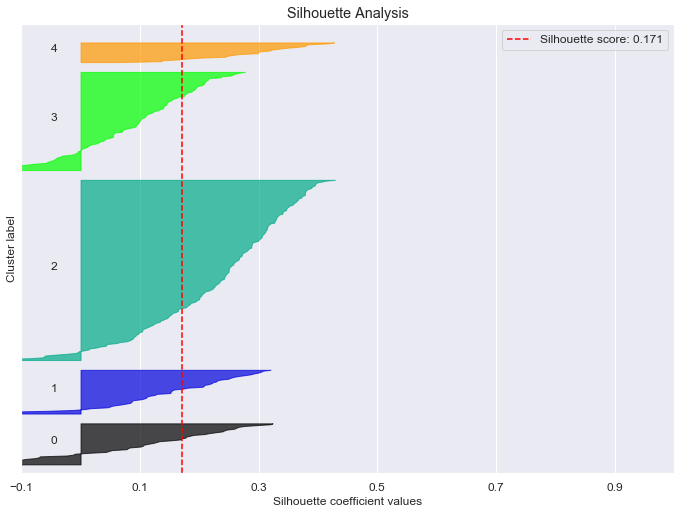

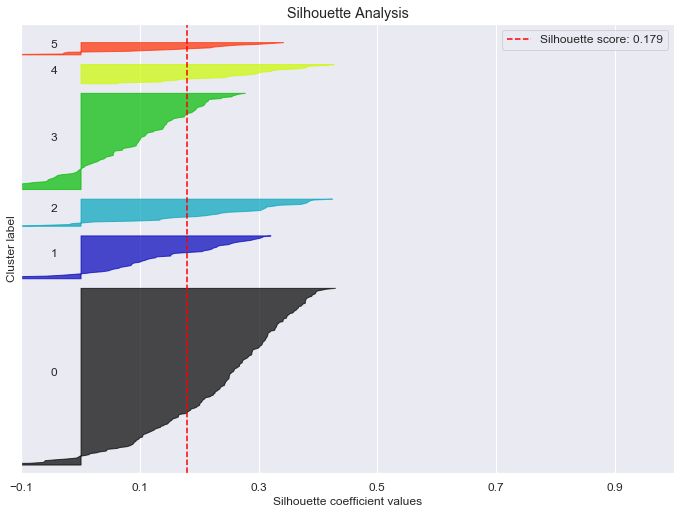

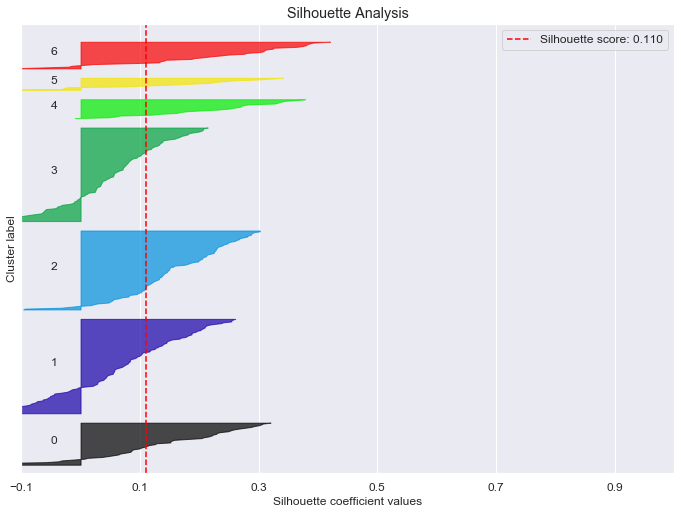

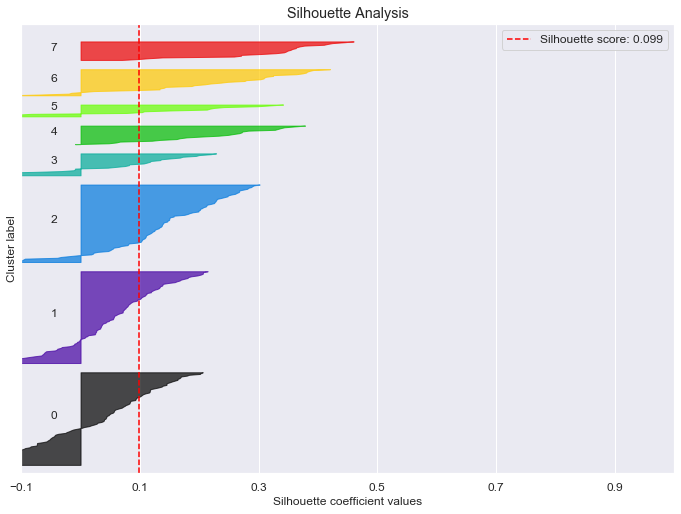

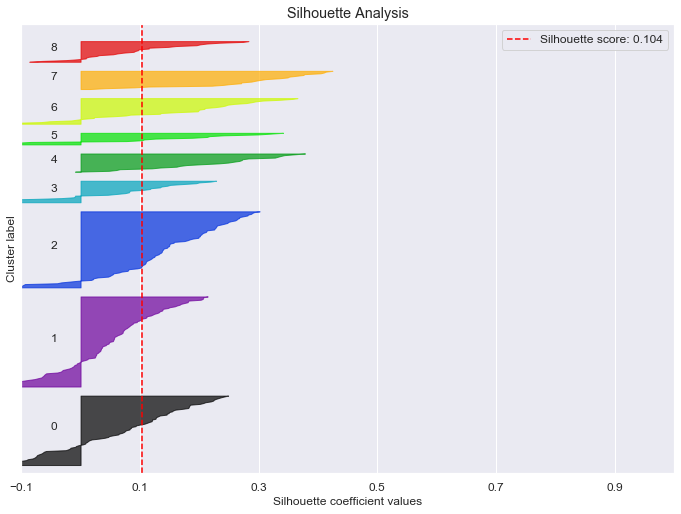

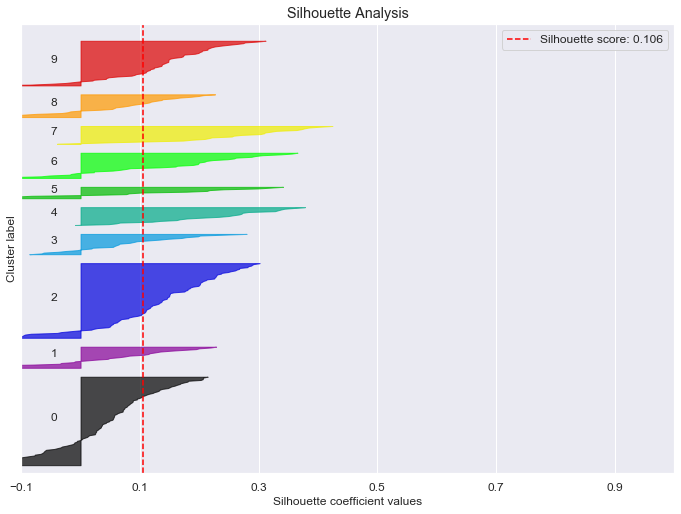

In [38]:
for i in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward') 
    cluster_labels = cluster.fit_predict(train)
    skplt.metrics.plot_silhouette(train, cluster_labels)
    plt.show()

### 2016 Hierarchical Clustering

#### 2 Clusters

In [ ]:
data = pd.read_csv("cap_data_final3.csv")
data = data.loc[(data['year'] == 2016),:]
data = data.dropna().reset_index()
data = data.drop(columns= ['district', 'state', 'abbreviation', 'year', 'state_dist', 'index'])

In [ ]:
#Standardize the Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data.drop('party', 1))

In [ ]:
pca = PCA(0.95)
pca.fit(data_rescaled)
train = pca.transform(data_rescaled)

In [496]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(train)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

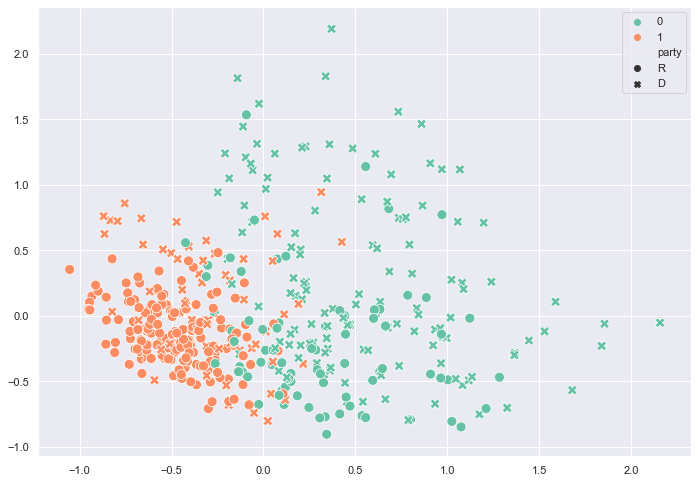

In [378]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(train[:,0], train[:,1], cluster.labels_, palette = 'Set2', style = data.party, s =100)

#### 3 clusters

In [401]:
pca = PCA(0.95)
pca.fit(data_rescaled)
train = pca.transform(data_rescaled)

In [402]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(train)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0,
       2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

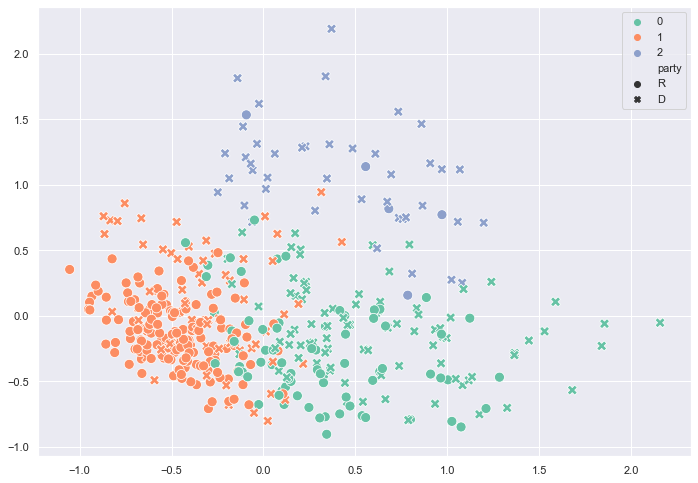

In [403]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(train[:,0], train[:,1], cluster.labels_, palette = 'Set2', style = data.party, s =100)

#### 4 clusters

In [379]:
pca = PCA(0.95)
pca.fit(data_rescaled)
train = pca.transform(data_rescaled)

In [380]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(train)

array([0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 3, 3, 2, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1, 2, 1, 1, 1, 3, 2, 3, 3,
       3, 3, 3, 1, 2, 2, 1, 3, 2, 1, 2, 2, 3, 2, 2, 1, 2, 2, 3, 2, 2, 1,
       2, 3, 1, 3, 3, 2, 1, 3, 3, 3, 0, 3, 0, 3, 3, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 2, 3, 3, 3,
       2, 2, 2, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0,
       0, 3, 2, 1, 1, 0, 3, 1, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 1, 0, 3, 1, 1, 1, 1, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 3, 1, 3, 3, 3, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 3, 3, 0, 0, 1,
       0, 0, 1, 1, 3, 1, 2, 3, 0, 1, 1, 0, 3, 0, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,

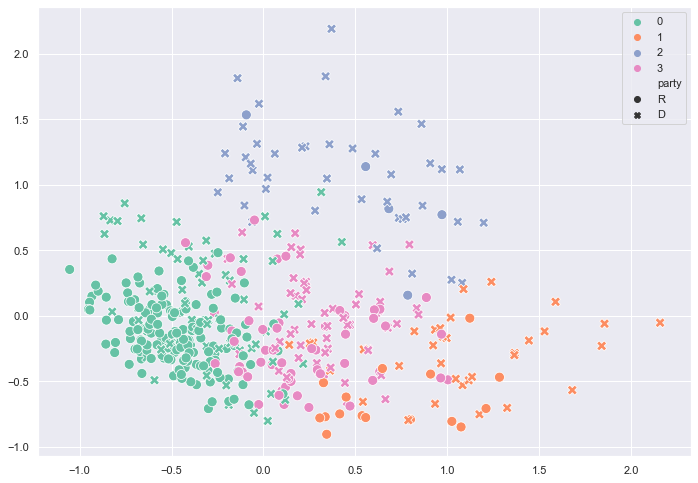

In [381]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(train[:,0], train[:,1], cluster.labels_, palette = 'Set2', style = data.party, s =100)

#### 6 clusters

In [382]:
pca = PCA(0.95)
pca.fit(data_rescaled)
train = pca.transform(data_rescaled)

In [383]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(train)

array([0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 2, 0, 3, 3, 2, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 5, 1, 1, 2, 1, 1, 1, 3, 2, 3, 3,
       3, 3, 3, 1, 5, 2, 1, 3, 2, 1, 2, 2, 3, 5, 2, 1, 2, 2, 3, 5, 2, 1,
       2, 3, 1, 3, 3, 2, 1, 3, 3, 3, 0, 3, 0, 3, 3, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 2, 3, 3, 3,
       2, 2, 2, 0, 4, 0, 4, 4, 3, 3, 0, 0, 0, 3, 0, 4, 0, 3, 3, 0, 0, 4,
       4, 3, 2, 1, 1, 4, 3, 1, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 4, 1, 0, 3, 1, 1, 1, 1, 5, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 4, 4, 0, 3, 1, 3, 3, 3, 0, 0, 0,
       4, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 3, 3, 0, 0, 1,
       0, 0, 1, 1, 3, 1, 2, 3, 4, 1, 1, 0, 3, 0, 1, 1, 1, 1, 5, 5, 5, 5,
       5, 1, 5, 1, 5, 5, 5, 5, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0,

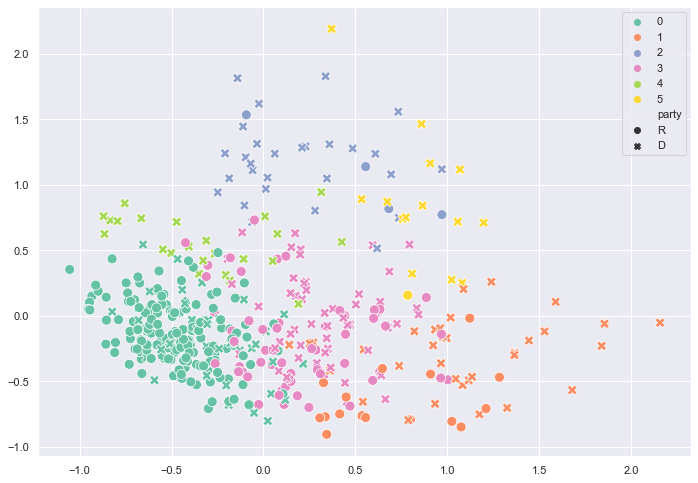

In [384]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(train[:,0], train[:,1], cluster.labels_, palette = 'Set2', style = data.party, s =100)

#### 8 Clusters

In [385]:
pca = PCA(0.95)
pca.fit(data_rescaled)
train = pca.transform(data_rescaled)

In [386]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(train)

array([0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 2, 0, 3, 3, 2, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 5, 1, 1, 2, 1, 1, 1, 3, 2, 3, 3,
       3, 3, 3, 1, 5, 2, 1, 3, 2, 1, 2, 2, 3, 5, 2, 1, 2, 2, 3, 5, 2, 1,
       2, 3, 1, 3, 3, 2, 1, 3, 3, 3, 0, 3, 0, 3, 3, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 2, 3, 3, 3,
       2, 2, 2, 0, 4, 0, 4, 4, 3, 3, 0, 0, 0, 3, 0, 4, 0, 3, 3, 0, 0, 4,
       4, 3, 2, 1, 1, 4, 3, 1, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 4, 1, 0, 3, 1, 1, 1, 1, 5, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 4, 4, 0, 3, 1, 3, 3, 3, 0, 0, 0,
       4, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 3, 3, 0, 0, 1,
       0, 0, 1, 1, 3, 1, 2, 3, 4, 1, 1, 0, 3, 0, 1, 1, 1, 1, 5, 5, 5, 5,
       5, 1, 5, 1, 5, 5, 5, 5, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0,

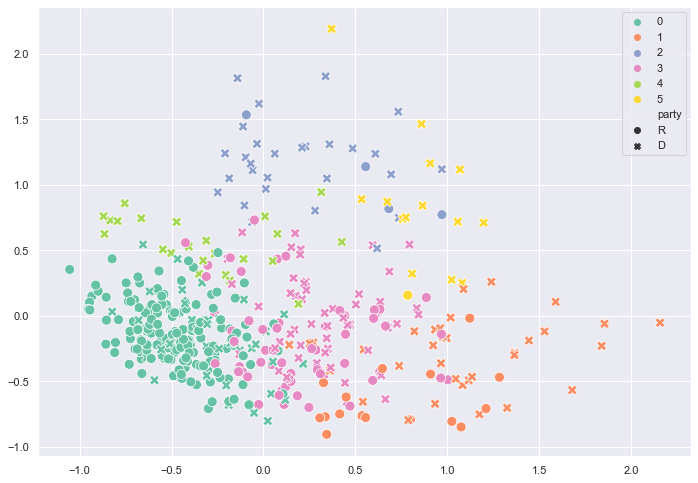

In [387]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(train[:,0], train[:,1], cluster.labels_, palette = 'Set2', style = data.party, s =100)

### 2018 Average Silohette Score

In [17]:
data =pd.read_csv("cap_data_final3.csv")
data = data.loc[(data['year'] == 2018),:]
data = data.dropna().reset_index()
data = data.drop(columns= ['district', 'state', 'abbreviation', 'year', 'state_dist', 'index'])

In [18]:
#Standardize the Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data.drop('party', 1))

In [19]:
pca = PCA(0.95)
pca.fit(data_rescaled)
train = pca.transform(data_rescaled)

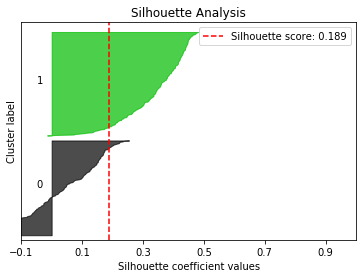

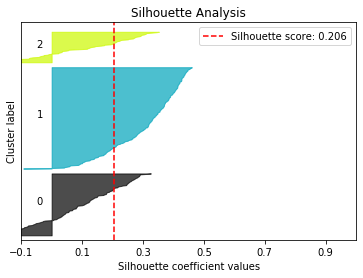

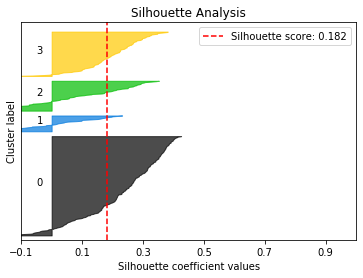

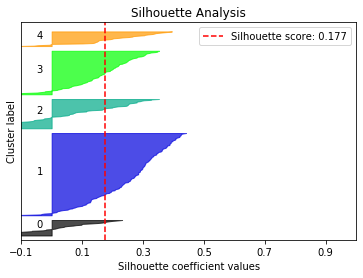

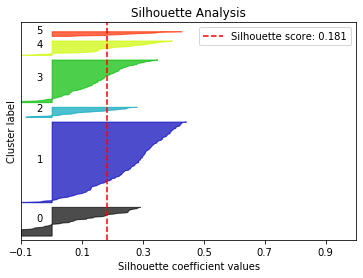

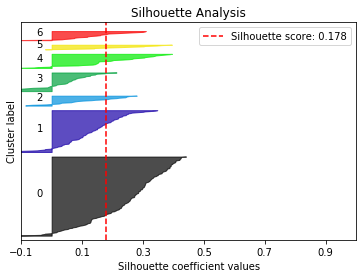

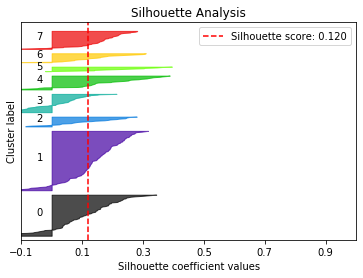

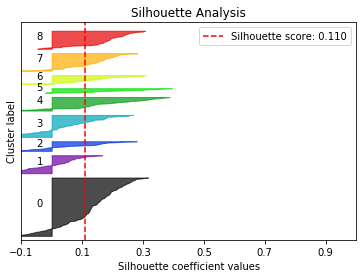

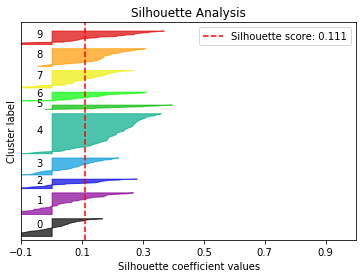

In [20]:
for i in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward') 
    cluster_labels = cluster.fit_predict(train)
    skplt.metrics.plot_silhouette(train, cluster_labels)
    plt.show()

### 2018 Hierarchical Clustering

#### 2 Clusters

In [ ]:
data =pd.read_csv("cap_data_final3.csv")
data = data.loc[(data['year'] == 2018),:]
data = data.dropna().reset_index()
data = data.drop(columns= ['district', 'state', 'abbreviation', 'year', 'state_dist', 'index'])

In [ ]:
#Standardize the Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data.drop('party', 1))

In [ ]:
pca = PCA(0.95)
pca.fit(data_rescaled)
train = pca.transform(data_rescaled)

In [429]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(train)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

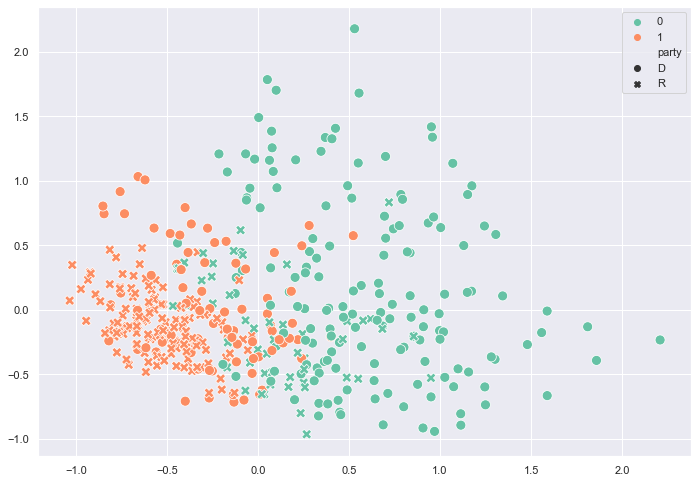

In [392]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(train[:,0], train[:,1], cluster.labels_, palette = 'Set2', style = data.party, s =100)

#### 3 clusters

In [417]:
pca = PCA(0.95)
pca.fit(data_rescaled)
train = pca.transform(data_rescaled)

In [418]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(train)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0,
       1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 2, 0, 0, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

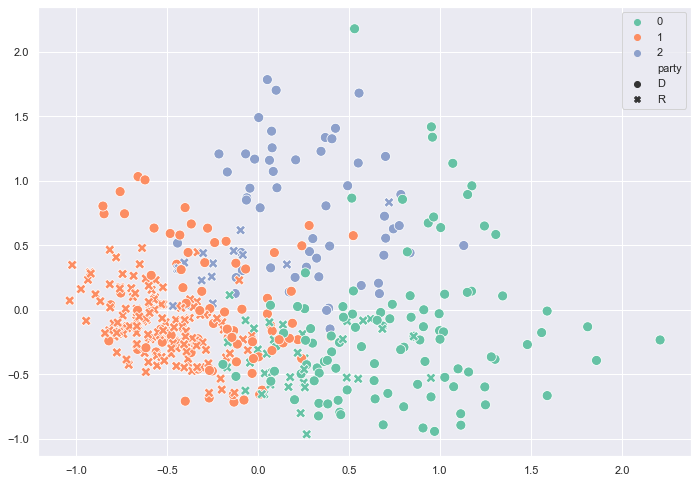

In [419]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(train[:,0], train[:,1], cluster.labels_, palette = 'Set2', style = data.party, s =100)

#### 4 clusters

In [393]:
pca = PCA(0.95)
pca.fit(data_rescaled)
train = pca.transform(data_rescaled)

In [394]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(train)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 3, 2, 0, 0, 0, 0, 3,
       2, 1, 2, 1, 2, 3, 2, 3, 2, 3, 1, 1, 1, 1, 3, 3, 2, 3, 3, 2, 2, 3,
       3, 2, 1, 2, 3, 2, 1, 1, 1, 2, 1, 2, 3, 1, 1, 3, 0, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 3, 2, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       2, 3, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 3,
       0, 0, 2, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0,
       0, 0, 2, 1, 3, 0, 0, 0, 2, 3, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 1, 1, 1, 0, 0, 0, 3, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 3, 2, 0, 0,
       3, 0, 3, 2, 1, 0, 3, 0, 3, 3, 3, 1, 2, 0, 2, 3, 1, 0, 1, 3, 1, 1,
       0, 0, 3, 1, 3, 3, 0, 1, 1, 1, 1, 1, 3, 1, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0,

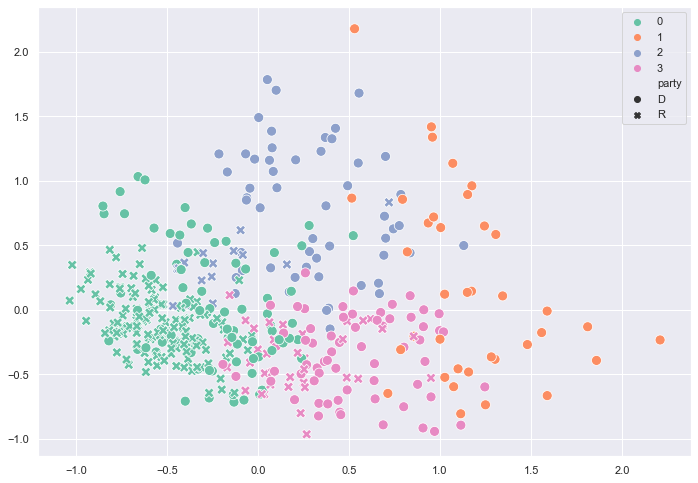

In [395]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(train[:,0], train[:,1], cluster.labels_, palette = 'Set2', style = data.party, s =100)

#### 6 Clusters

In [396]:
pca = PCA(0.95)
pca.fit(data_rescaled)
train = pca.transform(data_rescaled)

In [397]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(train)

array([4, 1, 1, 1, 4, 4, 1, 1, 1, 1, 3, 0, 3, 1, 3, 3, 0, 1, 1, 1, 1, 3,
       0, 2, 0, 5, 0, 3, 0, 3, 0, 3, 2, 2, 2, 2, 3, 3, 0, 3, 3, 0, 0, 3,
       3, 0, 2, 0, 3, 0, 2, 2, 2, 0, 2, 0, 3, 2, 2, 3, 1, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 3, 0, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1,
       0, 3, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 4, 0, 3,
       1, 1, 0, 1, 3, 0, 4, 4, 1, 1, 4, 4, 4, 3, 4, 1, 3, 1, 3, 3, 1, 1,
       1, 4, 0, 2, 3, 1, 1, 1, 0, 3, 0, 0, 1, 1, 4, 2, 3, 4, 1, 1, 3, 1,
       1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       4, 4, 1, 1, 1, 4, 4, 1, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 3, 2, 2, 1,
       1, 4, 1, 1, 1, 1, 4, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3,
       4, 4, 4, 1, 3, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 0, 3, 0, 1, 1,
       3, 1, 3, 0, 5, 1, 3, 1, 3, 3, 3, 5, 0, 1, 0, 3, 5, 1, 5, 3, 5, 5,
       1, 1, 3, 5, 3, 3, 1, 5, 5, 2, 2, 5, 3, 5, 3, 1, 1, 1, 1, 1, 1, 4,
       1, 3, 1, 3, 1, 4, 1, 3, 1, 1, 3, 1, 1, 4, 1,

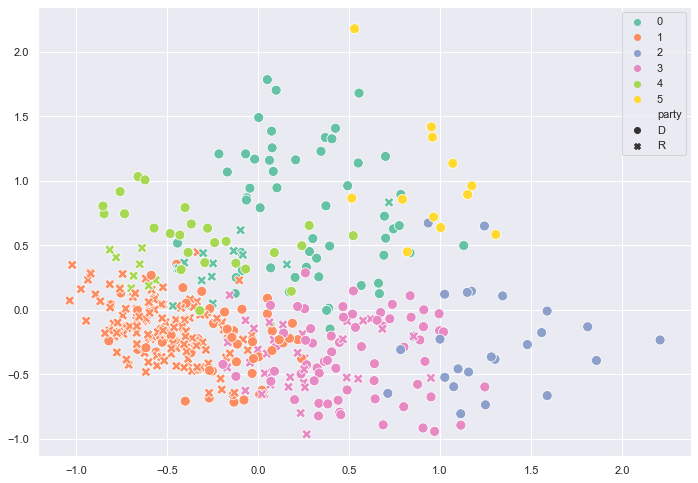

In [398]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(train[:,0], train[:,1], cluster.labels_, palette = 'Set2', style = data.party, s =100)

#### 8 Clusters

In [423]:
pca = PCA(0.95)
pca.fit(data_rescaled)
train = pca.transform(data_rescaled)

In [424]:
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')  
cluster.fit_predict(train)

array([4, 1, 1, 1, 4, 4, 1, 7, 7, 1, 0, 6, 0, 7, 0, 0, 3, 1, 1, 1, 7, 0,
       3, 2, 3, 5, 3, 0, 3, 0, 3, 0, 2, 2, 2, 2, 0, 0, 6, 0, 0, 3, 3, 0,
       0, 3, 2, 6, 0, 3, 2, 2, 2, 6, 2, 3, 0, 2, 2, 0, 7, 3, 3, 6, 3, 6,
       3, 6, 0, 6, 3, 6, 0, 6, 0, 7, 0, 0, 0, 0, 7, 1, 1, 0, 1, 1, 1, 7,
       3, 0, 1, 1, 6, 3, 1, 1, 6, 1, 3, 1, 3, 3, 3, 3, 3, 7, 7, 4, 3, 0,
       1, 1, 3, 1, 0, 3, 4, 4, 1, 1, 4, 4, 4, 0, 4, 1, 0, 1, 0, 0, 7, 7,
       1, 4, 3, 2, 0, 1, 1, 1, 3, 0, 3, 6, 7, 1, 4, 2, 0, 4, 1, 1, 0, 1,
       1, 1, 1, 1, 4, 0, 1, 1, 1, 7, 0, 7, 7, 1, 1, 1, 1, 1, 7, 1, 4, 1,
       4, 4, 1, 1, 1, 4, 4, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1,
       1, 4, 1, 1, 1, 1, 4, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       4, 4, 4, 1, 0, 1, 1, 7, 1, 1, 4, 1, 7, 0, 7, 7, 7, 6, 0, 3, 1, 1,
       0, 1, 0, 3, 5, 1, 0, 1, 0, 0, 0, 5, 3, 7, 3, 0, 5, 1, 5, 0, 5, 5,
       1, 1, 0, 5, 0, 0, 1, 5, 5, 2, 2, 5, 0, 5, 0, 1, 1, 1, 1, 1, 1, 4,
       1, 0, 1, 0, 1, 4, 1, 0, 1, 1, 0, 7, 1, 4, 1,

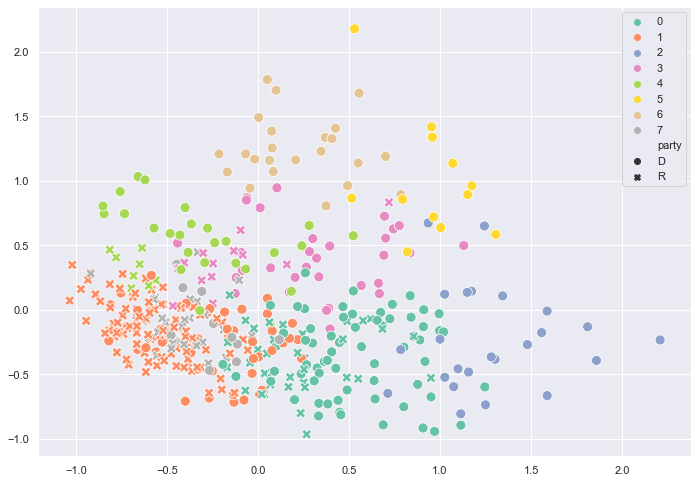

In [425]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(train[:,0], train[:,1], cluster.labels_, palette = 'Set2', style = data.party, s =100)